
Bad key text.latex.preview in file c:\Users\Mikhail\Anaconda3\envs\scientificProject\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\Mikhail\Anaconda3\envs\scientificProject\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\Mikhail\Anaconda3\envs\scientificProject\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 

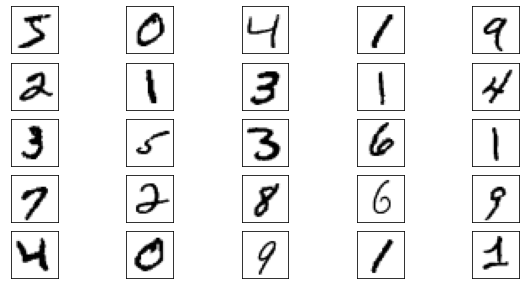

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2821 - accuracy: 0.9204 - val_loss: 0.1497 - val_accuracy: 0.9562
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1246 - accuracy: 0.9629 - val_loss: 0.1168 - val_accuracy: 0.9662
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0856 - accur

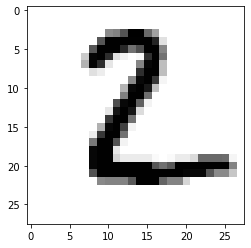

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(269, 28, 28)


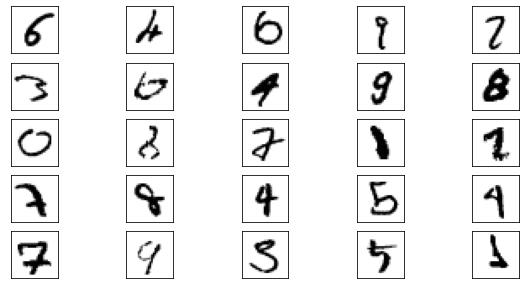

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

In [2]:
y_test[~mask][:25]

array([6, 4, 6, 9, 2, 3, 6, 4, 9, 8, 0, 8, 2, 1, 2, 7, 8, 4, 5, 4, 7, 9,
       3, 5, 1], dtype=uint8)

In [3]:
pred[~mask][:25]

array([5, 2, 0, 8, 7, 7, 0, 7, 8, 2, 7, 2, 8, 8, 1, 3, 4, 9, 8, 9, 2, 7,
       5, 4, 2], dtype=int64)